In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy.interpolate import interp1d
%matplotlib inline

In [3]:
consumption = {}
consumption['dryer'] = np.array([900,1000,1200,1150,1000,930,720,900,850])/1000
consumption['dish_washer'] = np.array([1150,1280,900,990,720,340,850])/1000
consumption['washing_maschine'] = np.array([900,1000,1730,720,900,670,1150,840,750])/1000

#prizes = [0.23, 0.20, 0.14, 0.19,  0.17, 0.17, 0.26, 0.19,0.12, 0.8, 0.14, 0.17, 0.14, 0.14, 0.19,0.12, 0.8, 0.14, 0.12, 0.8, 0.14, 0.17, 0.18, 0.21]
#prizes = np.array([prizes, prizes, prizes, prizes, prizes, prizes]).flatten()
#print(np.shape(prizes))

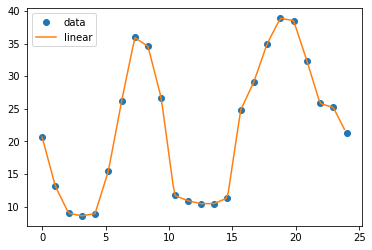

(144,)


In [4]:
washing_ = [226.27333333333334, 1556.3512500000002, 1570.1, 78.38625, 302.69222222222226,\
            80.462, 87.51333333333332,79.86666666666666, 243.6725, 84.29375000000002, 3.1566666666666667,\
            6.928888888888888, 4.215000000000001, 1.6989999999999998]
price_list = [20.64, 13.11, 9.00, 8.58, 8.94, 15.44, 26.14, 35.93, 34.55, 26.62, 11.73, 10.91, 10.46, 10.47,\
              11.34, 24.81, 29.14, 34.96, 38.88, 38.51, 32.40, 25.82, 25.21, 21.22]
x = np.linspace(0, 24, num=24, endpoint=True)
y = price_list
linear_prices = interp1d(x, y)

xnew = np.linspace(0, 24, num=24*6, endpoint=False)
plt.plot(x, y, 'o', xnew, linear_prices(xnew), '-')
plt.legend(['data', 'linear'], loc='best')
plt.show()
prices = linear_prices(xnew)
print(np.shape(prices))

In [5]:
# available data: dict with average comsumtion load curve of dryer, washing maschine, dish washer in 10 min steps
# engergy prizes in 10 minutes steps
def calculateCost(start_index, end_index, device_key):
    runtime_steps = len(consumption[device_key])
    assert end_index - start_index >= runtime_steps
    latest_start_index = end_index - runtime_steps
    time_steps = (latest_start_index - start_index) +1
    results = np.zeros(time_steps)
    
    for i in range(time_steps):
        temp_start_index = start_index + i
        temp_sum = 0
        for j in range(runtime_steps):
            temp_sum = temp_sum + consumption[device_key][j]*prices[temp_start_index + j]
        results[i] = temp_sum
        
    return start_index, results

def giveIdealTimes(start_time, result_vector):
    indexes = [i+ start_time for i, x in enumerate(result_vector) if x == min(result_vector)]
    return indexes

def timeToIndex(hour, minutes):
    assert minutes %10 == 0 and hour in range(24) and  minutes in range(60)
    index = hour*6 + minutes/10
    return int(index)

def indexToTime(index):
    hours_index = math.floor(index/6)
    hours =['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'][hours_index]
    minutes = (index - hours_index*6)*10
    if minutes == 0:
        time = hours +':00  '
    else:
        time = hours +':'+str(minutes)+'  '
    return time


In [9]:
start_index = timeToIndex(18,0) # 08:20
end_index = timeToIndex(21,30) #16:30

[start_index, result] = calculateCost(start_index, end_index,'washing_maschine')
times = [indexToTime(i+start_index) for i in range(len(result))]
df = pd.DataFrame(result, index=times, columns={'Price'})
display(df)
ideal_indexes = giveIdealTimes(start_index, result)
#print(ideal_indexes)
time = indexToTime(ideal_indexes[0])
print('Ideal time is at '+time)


,Price
18:00,327.303109
18:10,330.200983
18:20,332.519708
18:30,334.104559
18:40,333.965044
18:50,332.378701
19:00,329.328165
19:10,325.654201
19:20,321.162287
19:30,315.970013


Ideal time is at 20:00  
